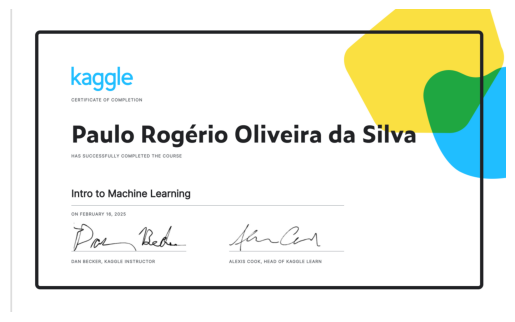

In [1]:
##Resposta questão 1
### GIT --> https://github.com/paulo-rogerio-oliveira/classify.alg.git
from PIL import Image
import matplotlib.pyplot as plt

# print screen of my monitor
image_path = 'data/kaggle_cert.png'

# Open the image file
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [3]:
import pandas as pd

In [5]:
## Resposta da questão 2
### Foi feito o download pra máquina da base solicitada e utilizado somente os vinhos brancos
file_path='data/winequalityN.csv'
data= pd.read_csv(file_path)
whites = data[data['type'] == 'white']

In [7]:
print(whites.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [10]:
whites.loc[:, 'opinion']= whites['quality'].apply(lambda x: 0 if x <=5 else 1)


C:\Users\paulo.rogerio\AppData\Local\Temp\ipykernel_11884\2587162405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whites.loc[:, 'opinion']= whites['quality'].apply(lambda x: 0 if x <=5 else 1)


In [12]:
print(whites.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  opinion  
0       0.45      8.8        6        1  
1       0.49      9.5     

In [15]:
# Resposta questão 3
# A variável quality é discreta, type e opinion são categóricas. Todas as demais são continuas. 
# As médias e desvio padrão estão listadas nas linhas mean e std do plot abaixo
whites.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


In [17]:
##Resposta questão 4 - A

### As etapas necessárias para criar um modelo de classificação eficiente pode ser dividas em preparar os dados e configurar o treinamento
### Preparar os dados --> Na etapa de preparo é feito o tratamento de valores faltantes, tratar variáveis categoricas e separar 
### features da coluna de predição, separar os dados de teste, realizar a normalização de dados

### Configurar o treinamento --> Separar as variáveis preditoras (X) e a variável alvo (y). Utilizar validação cruzada estratificada para garantir
### uma distribuição uniforme


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Verificar valores ausentes
missing_values = whites.isnull().sum()
print(missing_values)

#preenchendo valores ausentes
whites.dropna(inplace=True)
print(whites.isnull().sum())

whites['opinion'].value_counts(normalize=True)

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
opinion                 0
dtype: int64
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
opinion                 0
dtype: int64


C:\Users\paulo.rogerio\AppData\Local\Temp\ipykernel_11884\3762333796.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whites.dropna(inplace=True)


opinion
1    0.665298
0    0.334702
Name: proportion, dtype: float64

In [21]:
features =['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = whites[features]

y=whites['opinion']

bons = sum(y == 1)  
ruins = sum(y == 0)  

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Configurar validação cruzada estratificada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [23]:
# Função para exibir métricas médias e desvios
def print_results(name, results):
    metrics = ["mean_test_accuracy", "mean_test_precision_weighted", 
               "mean_test_recall_weighted", "mean_test_f1_weighted"]
    std_metrics = ["std_test_accuracy", "std_test_precision_weighted", 
                   "std_test_recall_weighted", "std_test_f1_weighted"]

    metric_names = ["Acurácia", "Precisão", "Recall", "F1-score"]

    print(f"\n### Resultados para {name} ###")
    for metric_name, mean_metric, std_metric in zip(metric_names, metrics, std_metrics):
        print(f"{metric_name}: Média = {np.mean(results[mean_metric]):.4f}, "
              f"Desvio = {np.mean(results[std_metric]):.4f}")

In [29]:
## Resposta questão 4 - B -> modelo de regressão logistica


# Criar pipeline com Regressão Logística
pipeline = Pipeline([
    ('model', LogisticRegression(random_state=2))
])


# Definir hiperparâmetros para GridSearch
params_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'model__class_weight': ['balanced', None]
}

# Executar GridSearchCV
search = GridSearchCV(
    estimator=pipeline,
    param_grid=params_grid,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    cv=kfold,
    refit="f1_weighted",  # O melhor modelo será escolhido com base no f1-score
    error_score=np.nan,
    verbose=0
)

# Treinar o modelo e avaliar desempenho
search.fit(X, y)

# Extraindo os resultados da validação cruzada
results = search.cv_results_

# Cálculo das médias e desvios das métricas
print_results("Regressão logistica", results)


### Resultados para Regressão logistica ###
Acurácia: Média = 0.7339, Desvio = 0.0161
Precisão: Média = 0.7451, Desvio = 0.0163
Recall: Média = 0.7339, Desvio = 0.0161
F1-score: Média = 0.7311, Desvio = 0.0169


In [31]:
## Resposta questão 4 C - modelo arvore de decisão

from sklearn.tree import DecisionTreeClassifier
### **Árvore de Decisão**
pipeline_dt = Pipeline([
    ('model', DecisionTreeClassifier(random_state=2))
])

params_grid_dt = {
    'model__max_depth': range(2, 11),  
    'model__criterion': ['gini', 'entropy'],  
    'model__min_samples_split': [2, 5, 10]  
}

search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=params_grid_dt,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    cv=kfold,
    refit="f1_weighted",
    error_score=np.nan,
    verbose=0
)

# Treinar o modelo e avaliar desempenho
search_dt.fit(X, y)
results_dt = search_dt.cv_results_

# Exibir os resultados
print_results("Árvore de Decisão", results_dt)



### Resultados para Árvore de Decisão ###
Acurácia: Média = 0.7572, Desvio = 0.0158
Precisão: Média = 0.7549, Desvio = 0.0163
Recall: Média = 0.7572, Desvio = 0.0158
F1-score: Média = 0.7542, Desvio = 0.0163


In [33]:
## Resposta questão 4 D- modelo SVM

from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('model', SVC(random_state=2, probability=True))
])

params_grid_svm = {
    'model__C': [0.1, 1, 10, 100],  
    'model__kernel': ['linear', 'rbf'],  
    'model__gamma': ['scale', 'auto']  
}

search_svm = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=params_grid_svm,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    cv=kfold,
    refit="f1_weighted",
    error_score=np.nan,
    verbose=0
)

# Treinar o modelo e avaliar desempenho
search_svm.fit(X, y)
results_svm = search_svm.cv_results_


# Exibir os resultados
print_results("SVM", results_svm)


### Resultados para SVM ###
Acurácia: Média = 0.7701, Desvio = 0.0181
Precisão: Média = 0.7633, Desvio = 0.0199
Recall: Média = 0.7701, Desvio = 0.0181
F1-score: Média = 0.7603, Desvio = 0.0200


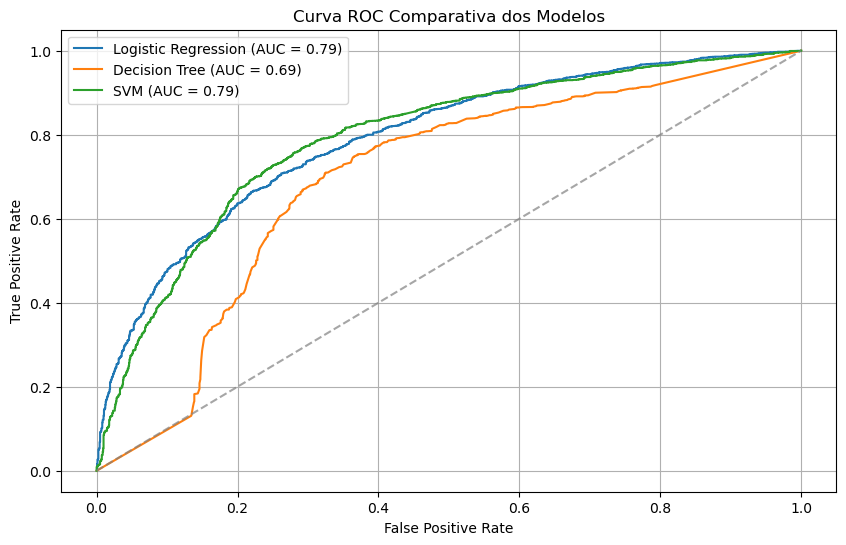

In [35]:
## Resposta questão 5 - Curva ROC
### Conforme demonstrado no gráfico abaixo o modelo svm e a regressão logistica desempenhou praticamente igual, pois tem a mesma área de curva
### Já o modelo de árvore de decisão tem uma área menor. Logo A escolha fica entre SVM e LR. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

# Criando um dicionário para armazenar os resultados da ROC
roc_curves = {}

# Teste os modelos diretamente com o melhor encontrado no GridSearchCV
model_names = ["Logistic Regression", "Decision Tree", "SVM"]
best_models = [search.best_estimator_, search_dt.best_estimator_, search_svm.best_estimator_]

# Calculando a Curva ROC para cada modelo
plt.figure(figsize=(10, 6))

for name, model in zip(model_names, best_models):
    # Fazer predições na validação cruzada (gera previsões para todo o dataset)
    y_probs = cross_val_predict(model, X, y, cv=10, method="predict_proba")[:, 1]

    # Calcular a Curva ROC
    fpr, tpr, _ = roc_curve(y, y_probs)
    roc_auc = auc(fpr, tpr)

    # Armazenar os resultados
    roc_curves[name] = (fpr, tpr, roc_auc)

    # Plotar a curva ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Linha de referência para um modelo aleatório
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.7)

# Configurações do gráfico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC Comparativa dos Modelos")
plt.legend()
plt.grid()
plt.show()


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
## Resposta questão 6
### Escolhi o modelo de regressão logistica e a métrica de acurácia ficou um pouco abaixo e precisão ficou acima. Porém as demais caíram muito
### Concluo que o modelo generalizou melhor a classe de vinhos bons que era a maioria no treinamento. Modelo otimista

# Carregar a base de vinhos tintos
data = pd.read_csv("data/winequalityN.csv")

df_tinto = data[data['type'] == 'red']

# Exibir as primeiras linhas para verificar se está correto
df_tinto.head()

df_tinto.loc[:, 'opinion']= df_tinto['quality'].apply(lambda x: 0 if x <=5 else 1)

# Verificar valores ausentes
missing_values = df_tinto.isnull().sum()

#preenchendo valores ausentes
df_tinto.dropna(inplace=True)

df_tinto['opinion'].value_counts(normalize=True)

y_tinto= df_tinto['opinion']

# Remover colunas desnecessárias 
X_tinto = df_tinto.drop(columns=['quality', 'opinion', 'type']) 

# Aplicar o mesmo escalonamento (caso tenha sido usado no treino)
X_tinto = scaler.transform(X_tinto)

# Fazer predições com o modelo já treinado
y_pred_tinto = search.best_estimator_.predict(X_tinto)

# Contar quantos vinhos foram classificados como "bons" e "ruins"
bons = sum(y_pred_tinto == 1)  
ruins = sum(y_pred_tinto == 0)  

print(f"Quantidade de vinhos bons: {bons}")
print(f"Quantidade de vinhos ruins: {ruins}")

# Calcular métricas
accuracy = accuracy_score(y_tinto, y_pred_tinto)
precision = precision_score(y_tinto, y_pred_tinto)
recall = recall_score(y_tinto, y_pred_tinto)
f1 = f1_score(y_tinto, y_pred_tinto)

# Exibir os resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Quantidade de vinhos bons: 310
Quantidade de vinhos ruins: 1283
Acurácia: 0.6227
Precisão: 0.9032
Recall: 0.3290
F1-score: 0.4823


C:\Users\paulo.rogerio\AppData\Local\Temp\ipykernel_11884\3530649418.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tinto.loc[:, 'opinion']= df_tinto['quality'].apply(lambda x: 0 if x <=5 else 1)
C:\Users\paulo.rogerio\AppData\Local\Temp\ipykernel_11884\3530649418.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tinto.dropna(inplace=True)
